In [1]:
from MFEA_lib.model import SMP_MFEA, GA, MFEA1, MFEA_base
from MFEA_lib.model.utils import *
from MFEA_lib.operators.Crossover import *
from MFEA_lib.operators.Mutation import *
from MFEA_lib.operators.Selection import *
from MFEA_lib.operators.Search import *
from MFEA_lib.tasks.Benchmark.Competitions import CEC17_benchmark, GECCO20_benchmark_50tasks, WCCI22_benchmark


### GA

In [5]:
task_id =  4

for task_id in range(0, 1):
    # cec17
    t, ic = CEC17_benchmark.get_10tasks_benchmark()

    ls_benchmark = [[t[task_id]]]
    ls_IndClass = [ic]
    name_benchmark = ["cec17_" + str(task_id)]

    path = './RESULTS/result/CEC17_10tasks/GA/'

    smpModel = MultiBenchmark(
        ls_benchmark= ls_benchmark,
        name_benchmark= name_benchmark,
        ls_IndClass= ls_IndClass,
        model= GA
    )
    smpModel.compile( 
        # crossover = KL_SBXCrossover(nc= 2, u= 0.001, conf_thres= 1),
        crossover = SBX_Crossover(nc = 2),
        mutation = PolynomialMutation(nm = 5, pm= 1),
        selection= ElitismSelection(random_percent= 0),
        attr_tasks = ['crossover', 'mutation',],
    )
    smpModel.fit(
        nb_generations= 1000, nb_inds_each_task= 100, mutation_rate= 0.1,
        evaluate_initial_skillFactor= True
    )
    a = smpModel.run(
        nb_run= 1,     
        save_path= path
    )

Seed: 0 -- Time: 00m 3.83s  100 % [====================>]  Cost: 6.10E-16  ,  
END!
DONE!
Saved


In [19]:
model = loadModel("D:/LinhTinh/Code_Lab/MFEA-v3.0/RESULTS/result/CEC17_10tasks/GA/cec17_0.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

In [20]:
for id in range(1, 10): 
    tmp_model = loadModel(f"D:/LinhTinh/Code_Lab/MFEA-v3.0/RESULTS/result/CEC17_10tasks/GA/cec17_{id}.mso", ls_tasks= ls_benchmark[0])
    model.history_cost = np.concatenate([model.history_cost, tmp_model.history_cost], axis=1) 

In [21]:
print(model.history_cost.shape)

(1001, 10)


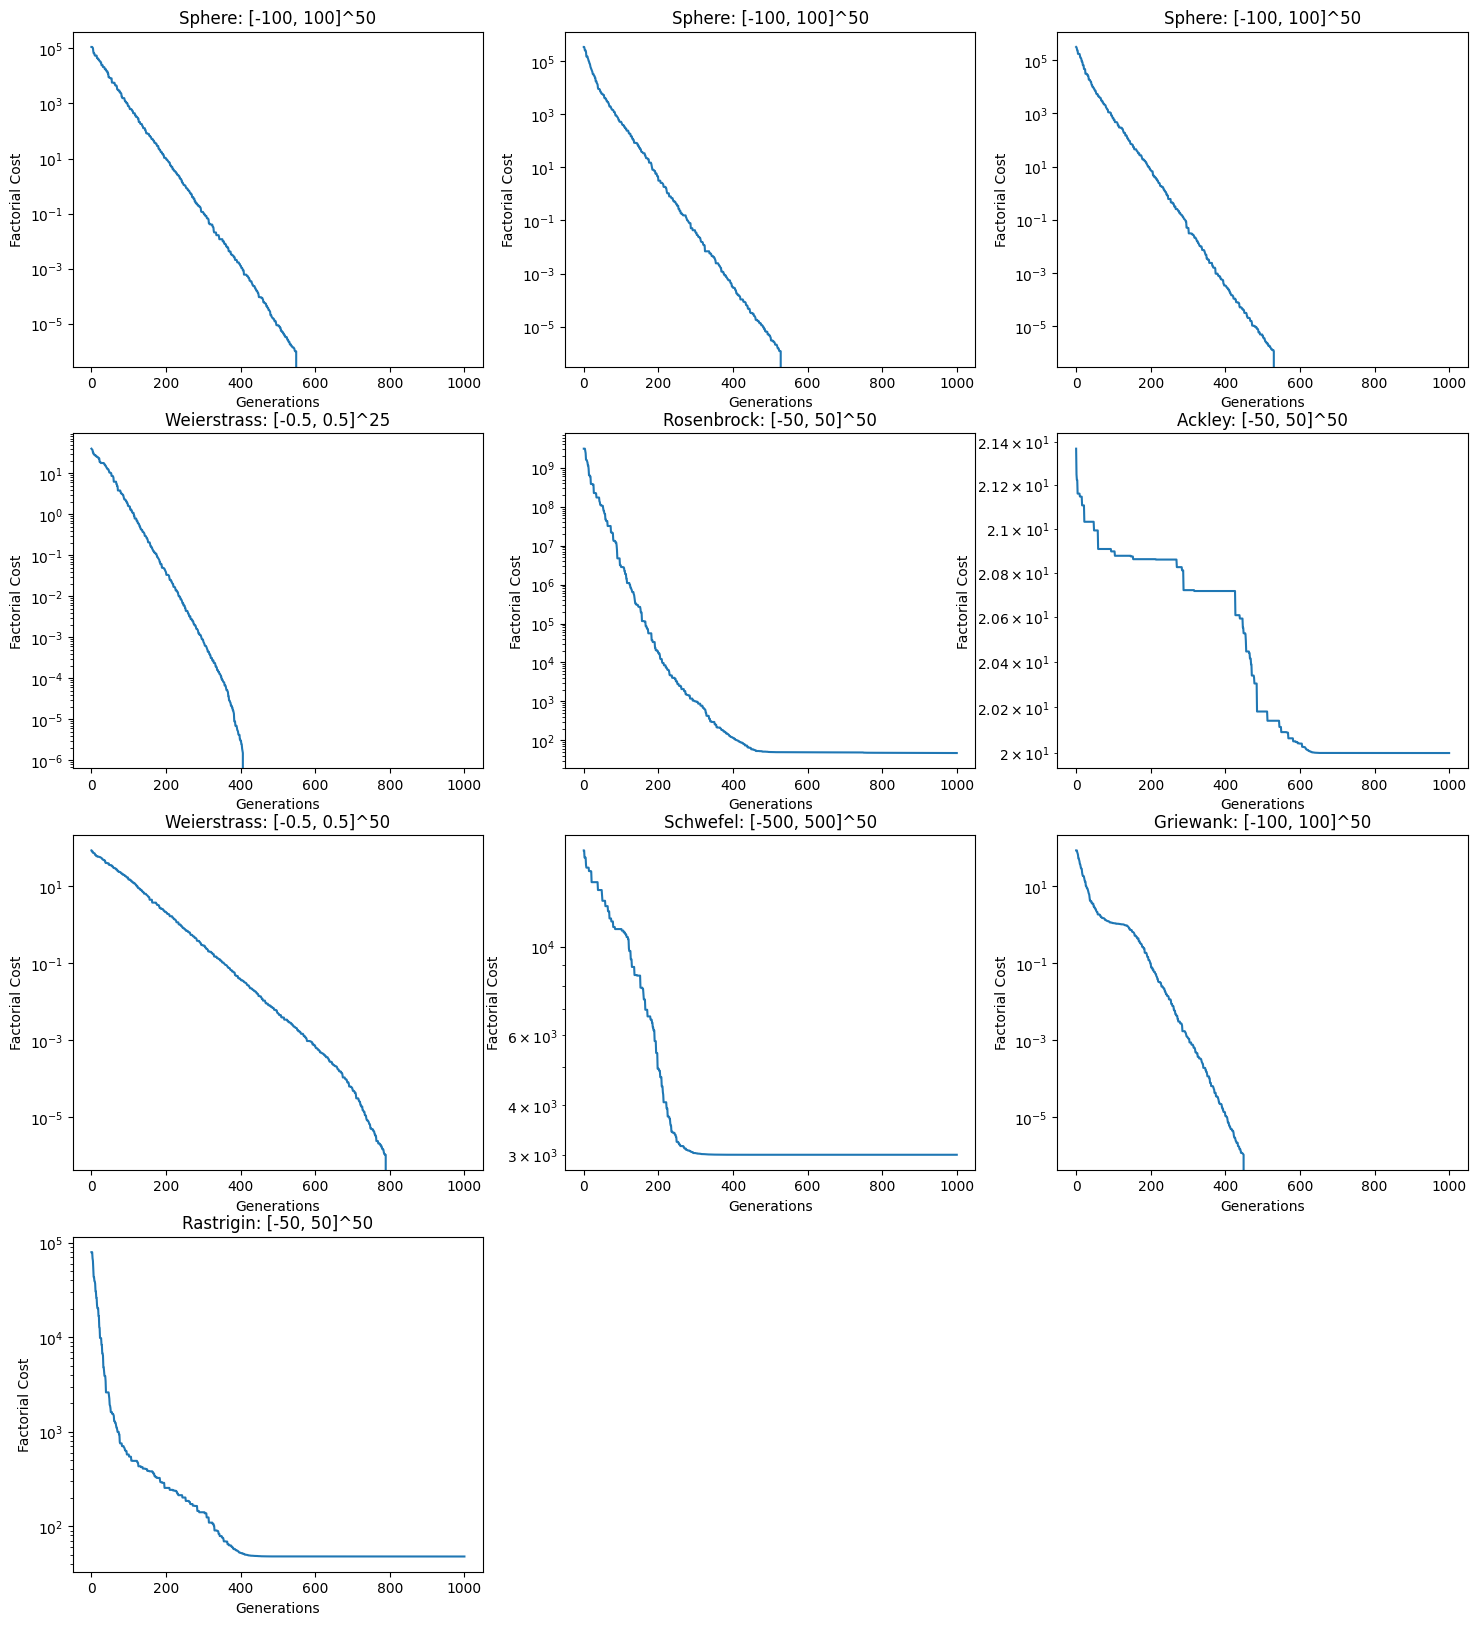

In [22]:
model.render_history(yscale='log')

### MFEA

In [2]:
# tasks, IndClass = CEC17_benchmark.get_2tasks_benchmark(1)
# tasks, IndClass = WCCI22_benchmark.get_complex_benchmark(1)
tasks, IndClass = CEC17_benchmark.get_10tasks_benchmark()

In [23]:
t, ic = CEC17_benchmark.get_10tasks_benchmark()

ls_benchmark = [t]
ls_IndClass = [ic]
name_benchmark = ["cec17"]

path = './RESULTS/result/CEC17_10tasks/MFEA/'

smpModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= MFEA1
)
smpModel.compile( 
    # crossover = KL_SBXCrossover(nc= 2, u= 0.001, conf_thres= 1),
    crossover = SBX_Crossover(nc = 2),
    mutation = PolynomialMutation(nm = 5, pm= 1),
    selection= ElitismSelection(random_percent= 0),
    attr_tasks = ['crossover', 'mutation',],
)
smpModel.fit(
    nb_generations = 1000, rmp = 0.3,mutation_rate=0.1, nb_inds_each_task= 100, 
    bound_pop= [0, 1], evaluate_initial_skillFactor= True
)
a = smpModel.run(
    nb_run= 1,     
    save_path= path
)

Seed: 0 -- Time: 00m 56.29s  100 % [====================>]  Cost: 1.50E-11  3.30E-12  1.25E-16  0.00E+00  2.33E-09  5.29E-07  9.88E-07  6.36E-04  4.49E-13  3.58E+01  ,  
END!
DONE!
Saved


In [24]:
mfea= loadModel("D:/LinhTinh/Code_Lab/MFEA-v3.0/RESULTS/result/CEC17_10tasks/MFEA/cec17.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

In [26]:
path = './RESULTS/result/CEC17_10tasks/SMP_KL/'

smpModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= SMP_MFEA
)
smpModel.compile( 
    crossover = KL_SBXCrossover(nc= 2, u= 0.001, conf_thres= 1),
    # crossover = SBX_Crossover(nc = 2),
    mutation = PolynomialMutation(nm = 5, pm= 1),
    selection= ElitismSelection(random_percent= 0.1),
    search= L_SHADE(len_mem= 15),
    attr_tasks = ['crossover', 'mutation', 'search'],
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 20,
    lr = 0.1, p_const_intra= 0., prob_search = 0., lc_nums = 200,
    nb_epochs_stop= 1000, swap_po= False,
    evaluate_initial_skillFactor= True
)
a = smpModel.run(
    nb_run= 1,     
    save_path= path
)

Seed: 0 -- Time: 00m 58.85s  100 % [====================>]  Pop_size: 1.90E+02  ,  Cost: 2.10E-26  2.58E-26  0.00E+00  0.00E+00  1.52E-24  4.31E-14  0.00E+00  6.36E-04  0.00E+00  0.00E+00  ,  
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[100318, 99282, 100382, 99692, 99840, 99736, 100588, 100198, 99130, 100864]
END!
DONE!
Saved


In [27]:
smp = loadModel("RESULTS/result/CEC17_10tasks/SMP_KL/cec17.mso", ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0])

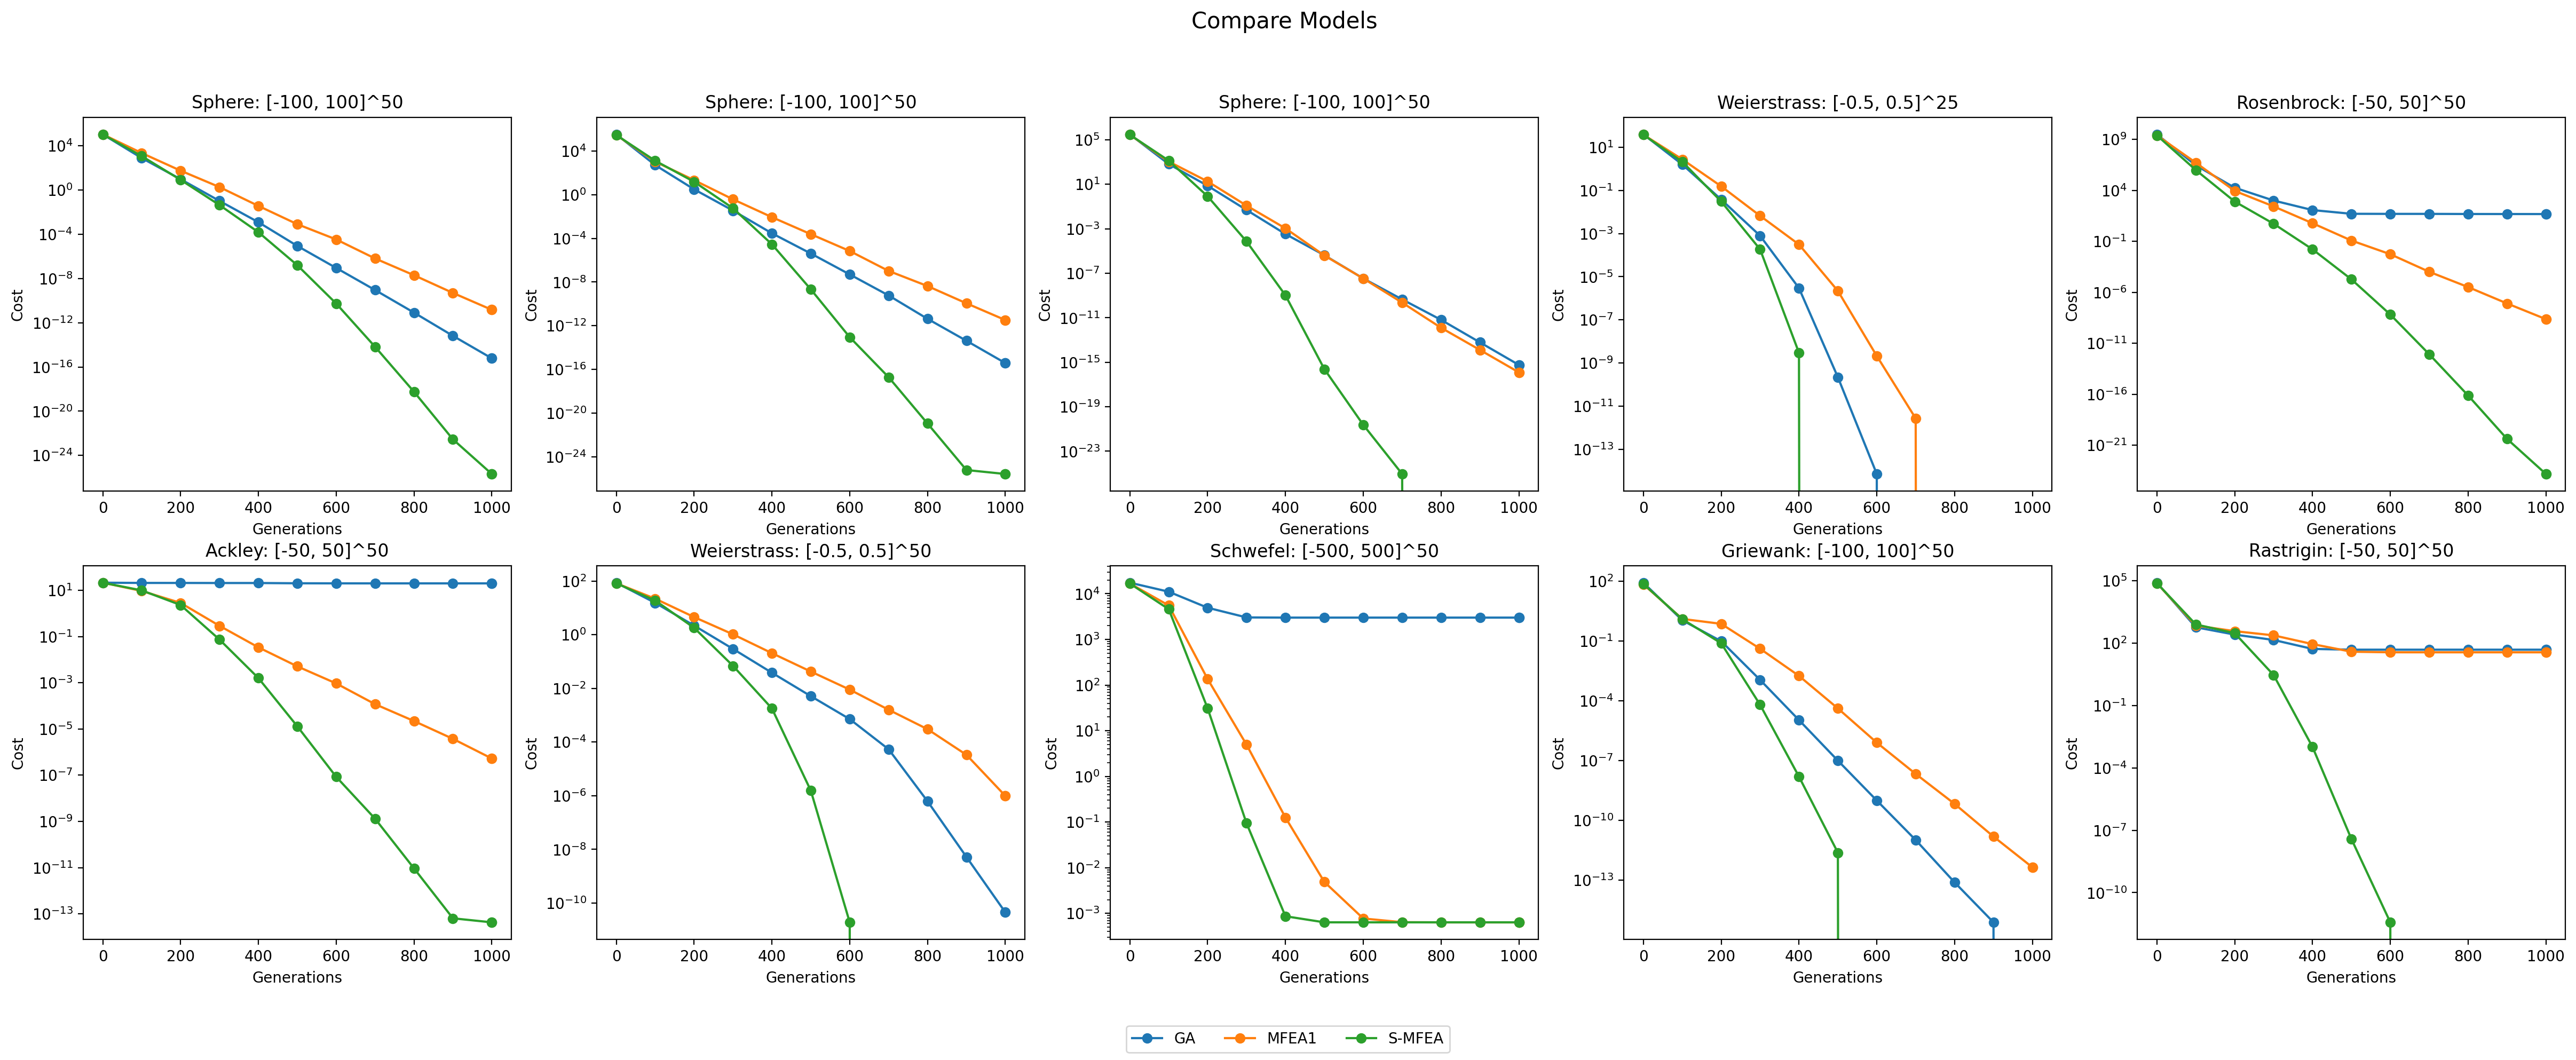

In [28]:

compare = CompareModel(
    models = [model, mfea, smp],
    label= ['GA', 'MFEA1', 'S-MFEA'],
)
compare.render(    
    shape = (2, 5),
    min_cost= 0,
    step= 100,
    yscale= 'log'
)